<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp-DataScience-projeto-modulo2/blob/main/Bootcamp_DataScience_final_modulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Módulo 2 - Bootcamp Data Science Aplicada 2 by [Alura](https://www.alura.com.br/) 

Autor: Helton Cordeiro

e-mail: heltoncordeiro@gmail.com

##Introdução
A vacinação foi eleita sucessivamente uma das dez maiores conquistas da saúde pública no último
século, sendo responsável por uma incrível redução da morbidade e mortalidade por doenças
infecciosas em todo o mundo (CDC 1999, 2011). Estimativas revelam que vacinas administradas
entre 2000 e 2030 em países de baixa e média renda podem prevenir 69 milhões de mortes, principalmente
entre crianças de até 5 anos (Li et al. 2021). E, nesse último ano, a pandemia de COVID-19
reforçou o papel revolucionário da vacina na saúde global, que se tornou o principal instrumento
para que o atual cenário seja superado.

Criado em 1973 pelo Ministério da Saúde, o Programa Nacional de Imunizações (PNI) é responsável por coordenar as ações de vacinação em todo o Brasil (da Silva Junior 2013). Com um desempenho e abrangência semelhantes ao de países desenvolvidos (Hommaet al. 2011, Sato 2015), a política coleciona inúmeras experiências exitosas, contribuindo para o declínio da morbidade e
mortalidade por doenças transmissíveis no país.

Os dados avaliados são provenientes do Sistema de Informações do Programa Nacional de Imunizações (SI-PNI), disponibilizados por meio do portal TABNET, do Departamento de Informática do SUS (DATASUS), com data de atualização em 10
de junho de 2021.


##Cobertura Vacinal

Mas afinal, o que é a cobertura vacinal?
Definição no FAQ da [TabNet](http://tabnet.datasus.gov.br/cgi/idb1998/fqf11.htm)
* Percentual de menores de um ano de idade imunizados com vacinas específicas, em determinado local e período.

![Cobertura Vacinal](https://github.com/hc0rd31r0/Bootcamp-DataScience-projeto-modulo2/blob/main/img/Cobertura_Vacinal.png?raw=true)

Quando se obtém altas e homogêneas coberturas ao longo dos anos, para uma dada doença imunoprevenível, assegura-se o controle, a eliminação ou a erradicação dessa doença.

---

## Objetivo

Apresentar a evolução da cobertura vacinal no Brasil nos últimos anos utilizando o que foi aprendido nos módulos 1 e 2 do Bootcamp de Data Science Aplicada 2 da Alura.

Primeiramente será apresentado uma cobertura geral do país, e depois focaremos na evolução da cobertura para a <i><strong>Poliomielite</strong></i>, como está a cobertura vacinal no País, nas capitais e os 20 municípios com a pior situação.

Em 1980, ocorreu a 1ª Campanha Nacional de Vacinação Contra Poliomielite, com o objetivo de vacinar todas as crianças menores de 5 anos, e que se repete todos os anos desde então. A erradicação da doença no país veio em 1989, quando o
último caso foi reportado na Paraíba.


---
## Origem dos dados

Qualquer busca por vacinação nos remete aos esforços ao combate a COVID-19, mas queremos uma análise mais ampla e não vinculada a uma pandemia.

No [SI-PNI - Sistema de Informação do Programa Nacional de Imunizações](http://pni.datasus.gov.br/) temos na página de apresentação um link para o [DATASUS](http://www.datasus.gov.br/), um link desatualizado.

Acredito que o Governo Federal, através do DATASUS, busca aprimorar seus sistemas, mas deixando uma versão anterior em produção, dificultando a identificação do site oficial. Temos 2 links possíveis:
* http://www2.datasus.gov.br/
* https://datasus.saude.gov.br/ (visual mais moderno)

Navegamos até o TABNET e apesar das diferença visuais de ambos os sites chegamos ao mesmo extrator de dados.

Utilizando a opção '*Assistência à Saúde*', '*Imunizações - desde 1994*' os dados foram extraído com base na opção **Cobetura**, link direto [TABNET - Imunização - Cobertura](http://tabnet.datasus.gov.br/cgi/dhdat.exe?bd_pni/cpnibr.def)

---

**Importando as bibliotecas necessárias**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# configurações default
pd.options.display.float_format = "{:,.2f}".format
plt.style.use('seaborn')
sns.set()

## Cobertura Vacinal de todas as Unidades da Federação

---

Vamos analisar os dados da cobertura vacinal nacional, a fim de verificar como está nosso percentual de cobertura ano a ano.

**Dados obtidos em 11/06/2021**.

Filtros utilizados:
*   **Linha**: Unidade da Federação
*   **Coluna**: Ano
*   **Conteúdo**: Coberturas Vacinais
*   **Período**: 2001 até 2020
*   **Arquivo**: https://raw.githubusercontent.com/hc0rd31r0/Bootcamp-DataScience-projeto-modulo2/main/dados/cobertura_uf_ano-cpnibr16233805076.csv

---

In [2]:
url_github = 'https://github.com/hc0rd31r0/Bootcamp-DataScience-projeto-modulo2/blob/main/dados/cobertura_uf_ano-cpnibr16233805076.csv?raw=true'
dv_uf_ano_raw = pd.read_csv(url_github, engine='python', encoding="ISO-8859-1", sep=";", thousands=".", decimal=",")
dv_uf_ano = dv_uf_ano_raw.copy()
dv_uf_ano.columns = dv_uf_ano.columns.str.strip()
dv_uf_ano.loc[27,"Unidade da Federação"] = "01 Brasil"
# Removo a coluna 'Total'
dv_uf_ano.drop("Total", axis=1, inplace=True)
# Continuando os ajustes
dv_uf_ano["uf"] = dv_uf_ano["Unidade da Federação"].str[3:]
dv_uf_ano = dv_uf_ano.drop(["Unidade da Federação"], axis = 1)
dv_uf_ano = dv_uf_ano.set_index("uf")

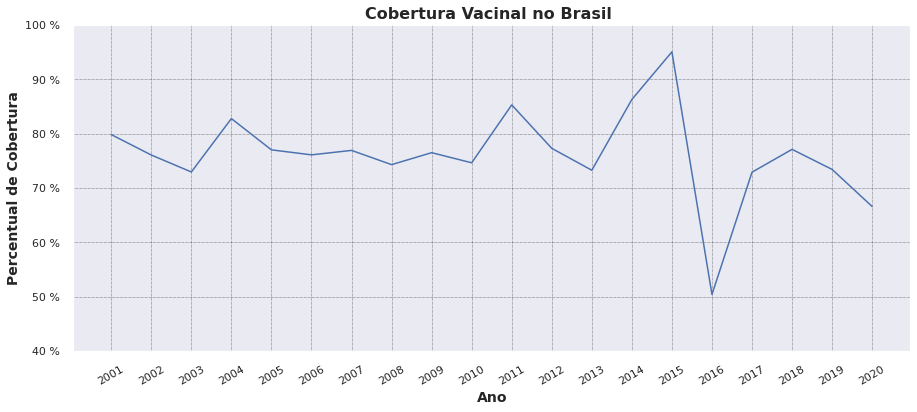

In [3]:
# Gráfico do Brasil
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=dv_uf_ano.T, x=dv_uf_ano.columns, y="Brasil")
ax.set_title('Cobertura Vacinal no Brasil ', fontsize=16, weight='black', loc='center')
ax.set_xlabel('Ano', fontsize=14, weight='black')
ax.set_ylabel('Percentual de Cobertura', fontsize=14, weight='black')
plt.xticks(rotation=30)
plt.ylim(40,100)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f} %'))
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

Na primeira vez que vi esse gráfico imaginei alguma falha na importação. Voltei ao site do Tabnet e refiz a pesquisa e para minha surpresa os dados estão corretos.

Encontrei alguns artigos que comentam a grande queda na cobertura no ano de 2016, onde **53%** das crianças menores de cinco anos, crianças de nove anos e adolescentes de 10 a 15 anos incompletos estão com a carteira de vacinação desatualizada. (veja)
* [Veja](https://veja.abril.com.br/saude/vacinacao-2016-teve-a-menor-cobertura-da-ultima-decada/)
* [Portal Conass](https://www.conass.org.br/consensus/queda-da-imunizacao-brasil/)
* [Pesquisa FAPESP](https://revistapesquisa.fapesp.br/as-razoes-da-queda-na-vacinacao/)


##**Riscos**

Mesmo com uma cobertura de 95% no ano de 2015, o que será que essa queda pode representar?

Considerando que o Brasil possui uma heterogeneidade regional nas coberturas surge o risco de doenças que já estão erradicadas voltarem ao país.


Partindo dessa possibilidade, quais seriam as doenças que poderiam retornar ao país devido a falha na vacinação?
* Sarampo
* Poliomielite
* Difteria
* Rubéola

A partir dessas informações aprofundei a análise sobre a ***Poliomielite***.

##**Poliomielite**

A poliomielite, também conhecida como paralisia infantil, é uma doença infecto-contagiosa causada por um vírus que vive no intestino, denominado **Poliovírus** e embora ocorra com maior frequência em crianças menores de cinco anos, também pode ocorrer em adultos. O vírus é transmitido pela via oral-fecal, por meio de alimentos e água contaminada. A sua proliferação ocorre no intestino, podendo invadir o sistema nervoso central e causar paralisia.

O período de incubação da doença varia de dois a trinta dias sendo, em geral, de sete a doze dias.  A maior parte das infecções apresenta poucos sintomas (forma subclínica) ou nenhum e estes são parecidos com os de outras doenças virais ou semelhantes às infecções respiratórias como gripe - febre e dor de garganta - ou infecções gastrintestinais como náusea, vômito, constipação (prisão de ventre), dor abdominal e, raramente, diarréia. Cerca de 1% dos infectados pelo vírus pode desenvolver a forma paralítica da doença, que pode causar sequelas permanentes, insuficiência respiratória e, em alguns casos, levar à morte. 

A poliomielite ***não tem tratamento***, portanto a prevenção por meio da vacina é a principal forma de combate à doença. A vacinação contra a poliomielite no país é composta por duas vacinas: a injetável, aplicada em três doses aos dois, quatro e seis meses de vida da criança; e a vacina oral aplicada aos 15 meses e aos quatro anos. 

Desde 1988, a doença é foco de uma importante <u>campanha mundial</u> de vacinação iniciada pela Organização Mundial da Saúde e chamada de Global PolioEradication Initiative [(GPEI)](https://polioeradication.org/where-we-work/polio-endemic-countries/). Apesar de não ter sido erradicada mundialmente, a maioria dos países, inclusive o Brasil, está livre da polio. Através de contínuas campanhas do PNI, o país teve o seu último caso em 1989 na Paraíba. Atualmente, a poliomielite permanece endêmica apenas no **Afeganistão** e no **Paquistão**.

<img src="https://s2.glbimg.com/8ipyRoRHVhrHvI6n54vnJE0k_gc=/0x0:620x465/984x0/smart/filters:strip_icc()/s.glbimg.com/jo/g1/f/original/2012/06/11/vacina_polio.jpg" alt="Vacinação" width="648" height="486">

.
<sub>
Campanha contra paralisia infantil no Pará; a vacina está disponível o ano inteiro em todos os postos de saúde, mas campanhas pontuais ajudam na divulgação - Foto: Elcimar Neves/Agência Pará</sub>

## Cobertura Vacinal com foco na Poliomielite


---


Vamos analisar a cobertura nacional focado apenas na Poliomielite.

**Dados obtidos em 10/06/2021**.

Filtros utilizados:
*   **Linha**: Unidade da Federação
*   **Coluna**: Ano
*   **Conteúdo**: Coberturas Vacinais
*   **Período**: 2001 até 2020
*   **Imuno**: Poliomielite
*   **Arquivo**: https://github.com/hc0rd31r0/Bootcamp-DataScience-projeto-modulo2/raw/main/dados/cobertura_uf_ano_polio-cpnibr16233773079.csv

---

In [4]:
url_github = 'https://github.com/hc0rd31r0/Bootcamp-DataScience-projeto-modulo2/blob/main/dados/cobertura_uf_ano_polio-cpnibr16233773079.csv?raw=true'
dv_uf_ano_polio_raw = pd.read_csv(url_github, engine='python', encoding="ISO-8859-1", sep=";", thousands=".", decimal=",")
dv_uf_ano_polio = dv_uf_ano_polio_raw.copy()
dv_uf_ano_polio.columns = dv_uf_ano_polio.columns.str.strip()
dv_uf_ano_polio.loc[27,"Unidade da Federação"] = "01 Brasil"
# Removo a coluna 'Total'
dv_uf_ano_polio.drop("Total", axis=1, inplace=True)
# Continuando os ajustes
dv_uf_ano_polio["uf"] = dv_uf_ano_polio["Unidade da Federação"].str[3:]
dv_uf_ano_polio = dv_uf_ano_polio.drop(["Unidade da Federação"], axis = 1)
dv_uf_ano_polio = dv_uf_ano_polio.set_index("uf")

In [5]:
dv_uf_ano_polio.tail()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
uf,,,,,,,,,,,,,,,,,,,,
Mato Grosso do Sul,111.29,114.34,107.08,99.47,100.48,104.61,104.83,96.87,106.10,99.64,95.54,102.28,118.01,130.10,120.36,93.78,91.49,95.95,94.41,81.75
Mato Grosso,117.54,111.61,108.27,109.45,112.94,109.60,112.30,104.55,107.67,100.40,103.22,99.50,101.20,102.47,102.81,90.64,84.07,90.27,85.81,80.80
Goiás,101.08,99.28,104.13,111.97,104.03,110.61,112.35,104.30,105.20,100.56,107.11,101.00,107.69,97.65,95.88,82.10,81.56,85.54,81.52,77.74
Distrito Federal,97.51,97.23,96.96,101.10,96.60,101.83,100.31,99.18,101.97,94.20,86.48,93.65,112.17,94.34,74.92,136.83,84.41,86.03,84.32,81.15
Brasil,102.83,100.01,100.48,104.30,105.12,105.25,105.43,100.18,103.66,99.35,101.33,96.55,100.71,96.76,98.29,84.43,84.74,89.54,84.19,75.86


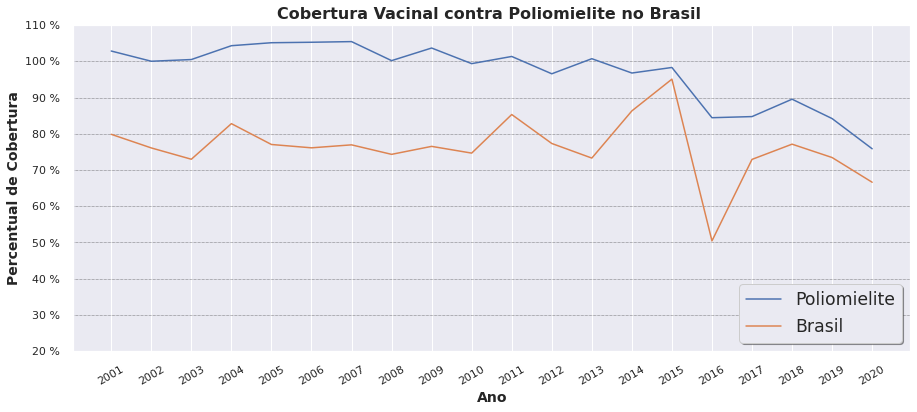

In [6]:
# Gráfico de cobertura contra a polio no Brasil
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=dv_uf_ano_polio.T, x=dv_uf_ano_polio.columns, y="Brasil")
sns.lineplot(data=dv_uf_ano.T, x=dv_uf_ano.columns, y='Brasil')
ax.set_title('Cobertura Vacinal contra Poliomielite no Brasil ', fontsize=16, weight='black', loc='center')
ax.set_xlabel('Ano', fontsize=14, weight='black')
ax.set_ylabel('Percentual de Cobertura', fontsize=14, weight='black')
plt.xticks(rotation=30)
plt.ylim(20,110)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f} %'))
plt.grid(color='black', linestyle=':', linewidth=0.5, axis='y')
plt.legend(labels=["Poliomielite","Brasil"], loc=4, fontsize='xx-large', frameon=True, shadow=True)
plt.show()

Mais uma vez tive que voltar ao TabNet para verificar os dados, como assim cobertura acima de 100%?

* Uma das hipóteses para a cobertura vacinal acima de 100% é a utilização de estimativas populacionais subdimensionadas, gerando resultados mais elevados que os verdadeiros valores de cobertura vacinal existentes na localidade avaliada.

* O acesso às salas de vacinação por usuários de municípios vizinhos, que eleva o número de vacinados para acima da população-alvo do respectivo município.

* Outra possibilidade seria a contabilização de vacinados em região de fronteira, vacinando assim os nossos hermanos, mas preciso aprofundar as análises para confirmar essa hipótese.

In [7]:
dv_uf_ano_polio.iloc[27:,14:20]

,2015,2016,2017,2018,2019,2020
uf,,,,,,
Brasil,98.29,84.43,84.74,89.54,84.19,75.86


Nos últimos seis anos, a cobertura vacinal contra a poliomielite no Brasil sofreu uma queda muito acentuada, passando de 98.29% em 2015 para apenas 75,86% em 2020, sendo que é necessário uma cobertura acima de 95% para se obter imunidade coletiva.

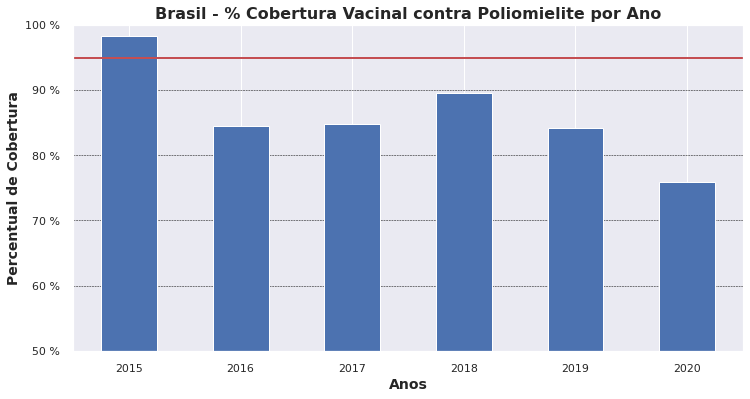

In [8]:
ax = dv_uf_ano_polio.iloc[27:,14:20].T.plot(kind="bar", figsize=(12,6), rot=0)
ax.set_title("Brasil - % Cobertura Vacinal contra Poliomielite por Ano", fontsize=16, weight='black', loc='center')
ax.set_xlabel('Anos', fontsize=14, weight='black')
ax.set_ylabel('Percentual de Cobertura', fontsize=14, weight='black')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f} %"))
plt.legend('')
plt.ylim(50,100)
plt.axhspan(94.9, 95.01, color='r')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y')
plt.show()

## Cobertura Vacinal contra Poliomielite nas Capital Brasileiras


---

Vamos analisar a cobertura vacinal nas capitais focado apenas na Poliomielite destacando a cidade de Curitiba.

**Dados obtidos em 10/06/2021**.

Filtros utilizados:
*   **Linha**: Capitais
*   **Coluna**: Ano
*   **Conteúdo**: Coberturas Vacinais
*   **Período**: 2001 até 2020
*   **Imuno**: Poliomielite
*   **Arquivo**: https://github.com/hc0rd31r0/Bootcamp-DataScience-projeto-modulo2/raw/main/dados/cobertura_capitais_ano_polio-cpnibr16233766514.csv


In [9]:
url_github = 'https://github.com/hc0rd31r0/Bootcamp-DataScience-projeto-modulo2/blob/main/dados/cobertura_capitais_ano_polio-cpnibr16233766514.csv?raw=true'
dv_capitais_ano_polio_raw = pd.read_csv(url_github, engine='python', encoding="ISO-8859-1", sep=";", thousands=".", decimal=",")
dv_capitais_ano_polio = dv_capitais_ano_polio_raw.copy()
dv_capitais_ano_polio.columns = dv_capitais_ano_polio.columns.str.strip()
# Ajustando o DataFrame
dv_capitais_ano_polio.loc[27,"Capital"] = "000000 Ignorado"
dv_capitais_ano_polio.loc[28,"Capital"] = "000000 Brasil"
# dv_capitais_ano_polio["cod_capital"] = dv_capitais_ano_polio["Capital"].str[:6]
dv_capitais_ano_polio["capital"] = dv_capitais_ano_polio["Capital"].str[7:]
dv_capitais_ano_polio = dv_capitais_ano_polio.set_index("capital").drop(["Capital"], axis = 1)
dv_capitais_ano_polio.drop("Ignorado", inplace=True)
# Removo a coluna 'Total'
dv_capitais_ano_polio.drop("Total", axis=1, inplace=True)

In [10]:
dv_capitais_ano_polio.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
capital,,,,,,,,,,,,,,,,,,,,
Porto Velho,96.69,93.51,90.07,98.95,102.54,96.97,98.74,99.19,104.97,99.07,112.76,111.54,96.01,104.25,97.79,100.15,104.87,109.12,82.53,72.83
Rio Branco,99.65,93.42,113.38,122.85,102.13,102.15,108.94,102.05,120.60,99.45,116.67,106.76,97.38,76.68,81.75,73.67,79.12,80.63,88.44,63.03
Manaus,93.37,96.40,85.63,81.14,86.38,82.89,91.84,86.44,90.19,93.54,87.15,92.07,89.90,100.98,113.17,88.02,76.50,74.52,82.68,71.88
Boa Vista,88.83,85.23,89.58,100.40,103.26,97.09,100.22,105.14,109.50,97.80,100.69,92.99,84.31,84.74,121.85,87.34,93.19,72.72,93.38,87.41
Belém,118.21,97.19,96.56,104.47,120.80,112.88,107.65,102.26,102.43,100.04,99.72,80.16,88.89,78.47,58.31,65.13,63.85,68.61,74.53,51.98


In [11]:
dv_capitais_ano_polio["Brasil":"Brasil"]

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
capital,,,,,,,,,,,,,,,,,,,,
Brasil,102.83,100.01,100.48,104.30,105.12,105.25,105.43,100.18,103.66,99.35,101.33,96.55,100.71,96.76,98.29,84.43,84.74,89.54,84.19,75.86


Percebemos que a linha de Total da cobertura por Capital confere com o Total Nacional, por isso a última linha foi renomeada para 'Brasil'.

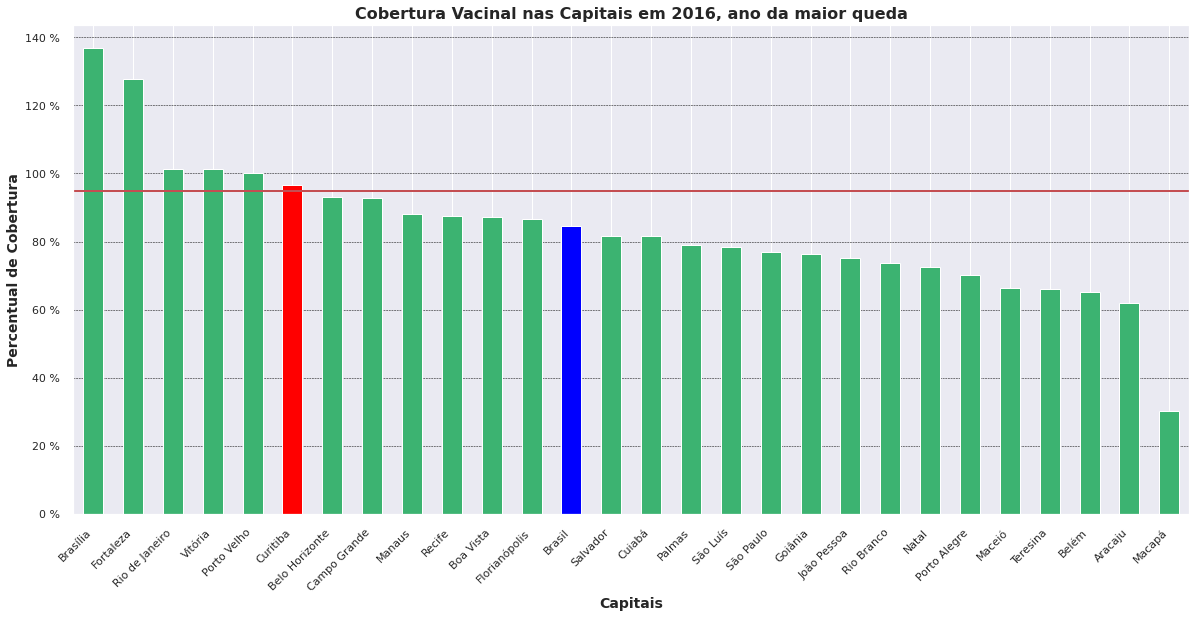

In [12]:
# Ordenado pelos valores de 2016
dv_capitais_ano_polio_2016 = dv_capitais_ano_polio.sort_values(by="2016", ascending=False)
idx_Curitiba = dv_capitais_ano_polio_2016.index.get_loc("Curitiba")
idx_Brasil = dv_capitais_ano_polio_2016.index.get_loc("Brasil")
cores = ["MediumSeaGreen"] * dv_capitais_ano_polio_2016.shape[0]
cores[idx_Curitiba] = 'red'
cores[idx_Brasil] = 'blue'
ax = dv_capitais_ano_polio_2016.plot(y='2016', kind="bar", figsize=(20,9), grid=True, color=cores)
ax.set_title("Cobertura Vacinal nas Capitais em 2016, ano da maior queda", fontsize=16, weight='black', loc='center')
ax.set_xlabel('Capitais', fontsize=14, weight='black')
ax.set_ylabel('Percentual de Cobertura', fontsize=14, weight='black')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f} %"))
ax.legend('')
plt.xticks(rotation=45, ha="right")
plt.axhspan(94.9, 95.01, color='r')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y')
plt.show()

Em destaque a cidade de Curitiba (em vermelho), com o percentual de cobertura acima de 95%, meta de cobertura representada pela linha vermelha e acima da média nacional (em azul).

Agora vamos verificar ano a ano nas capitais a partir de 2013, último ano que o percentual de cobertura vacinal ficou em 100%.

In [13]:
dv_capitais_ano_polio.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
capital,,,,,,,,,,,,,,,,,,,,
Porto Velho,96.69,93.51,90.07,98.95,102.54,96.97,98.74,99.19,104.97,99.07,112.76,111.54,96.01,104.25,97.79,100.15,104.87,109.12,82.53,72.83
Rio Branco,99.65,93.42,113.38,122.85,102.13,102.15,108.94,102.05,120.60,99.45,116.67,106.76,97.38,76.68,81.75,73.67,79.12,80.63,88.44,63.03
Manaus,93.37,96.40,85.63,81.14,86.38,82.89,91.84,86.44,90.19,93.54,87.15,92.07,89.90,100.98,113.17,88.02,76.50,74.52,82.68,71.88
Boa Vista,88.83,85.23,89.58,100.40,103.26,97.09,100.22,105.14,109.50,97.80,100.69,92.99,84.31,84.74,121.85,87.34,93.19,72.72,93.38,87.41
Belém,118.21,97.19,96.56,104.47,120.80,112.88,107.65,102.26,102.43,100.04,99.72,80.16,88.89,78.47,58.31,65.13,63.85,68.61,74.53,51.98


In [14]:
dv_capitais_ano_polio_analise = dv_capitais_ano_polio.iloc[:,12:20]
dv_capitais_ano_polio_analise = dv_capitais_ano_polio_analise.T
dv_capitais_ano_polio_analise.index.name = 'ano'
dv_capitais_ano_polio_analise

capital,Porto Velho,Rio Branco,Manaus,Boa Vista,Belém,Macapá,Palmas,São Luís,Teresina,Fortaleza,Natal,João Pessoa,Recife,Maceió,Aracaju,Salvador,Belo Horizonte,Vitória,Rio de Janeiro,São Paulo,Curitiba,Florianópolis,Porto Alegre,Campo Grande,Cuiabá,Goiânia,Brasília,Brasil
ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013,96.01,97.38,89.90,84.31,88.89,81.07,84.18,104.10,93.25,97.83,78.38,101.73,86.86,96.66,93.86,91.29,91.90,105.58,102.50,97.29,96.95,75.68,77.19,106.17,94.71,94.63,112.17,100.71
2014,104.25,76.68,100.98,84.74,78.47,74.89,81.58,81.17,85.77,98.05,72.74,103.16,94.79,83.14,87.72,90.57,49.24,105.31,100.22,92.06,91.81,69.37,85.06,95.09,100.25,92.41,94.34,96.76
2015,97.79,81.75,113.17,121.85,58.31,96.60,111.29,104.60,76.24,118.37,82.57,91.16,105.71,84.12,93.54,102.56,73.45,90.71,108.11,98.36,97.57,80.09,84.73,101.31,97.78,85.14,74.92,98.29
2016,100.15,73.67,88.02,87.34,65.13,30.20,78.94,78.48,66.02,127.83,72.48,75.07,87.47,66.22,61.85,81.66,92.96,101.29,101.42,76.94,96.65,86.67,70.04,92.80,81.60,76.24,136.83,84.43
2017,104.87,79.12,76.50,93.19,63.85,60.45,74.82,73.47,66.76,85.96,44.39,64.10,87.27,67.09,66.08,85.87,84.18,95.03,103.49,78.62,89.06,95.73,78.38,87.45,79.10,73.57,84.41,84.74
2018,109.12,80.63,74.52,72.72,68.61,65.76,86.78,61.57,75.14,129.96,96.53,80.53,86.84,79.55,75.91,76.50,89.31,96.59,97.96,92.55,93.93,79.44,76.35,90.46,74.32,81.05,86.03,89.54
2019,82.53,88.44,82.68,93.38,74.53,72.29,77.75,55.44,72.53,95.87,85.02,81.55,68.81,79.25,71.72,70.48,85.22,91.02,77.82,85.11,89.66,73.64,76.86,97.47,79.30,64.77,84.32,84.19
2020,72.83,63.03,71.88,87.41,51.98,36.03,86.05,37.38,61.23,95.56,68.29,57.31,65.27,73.03,58.92,72.29,90.38,81.03,73.26,74.94,86.25,54.26,77.67,77.03,71.71,71.81,81.15,75.86


In [15]:
dv_capitais_polio_aberto = dv_capitais_ano_polio_analise.reset_index().melt(id_vars=["ano"], value_vars=dv_capitais_ano_polio_analise.columns)
dv_capitais_polio_aberto.columns = ["ano","capital","percentual"]
dv_capitais_polio_aberto.head()

,ano,capital,percentual
0,2013,Porto Velho,96.01
1,2014,Porto Velho,104.25
2,2015,Porto Velho,97.79
3,2016,Porto Velho,100.15
4,2017,Porto Velho,104.87


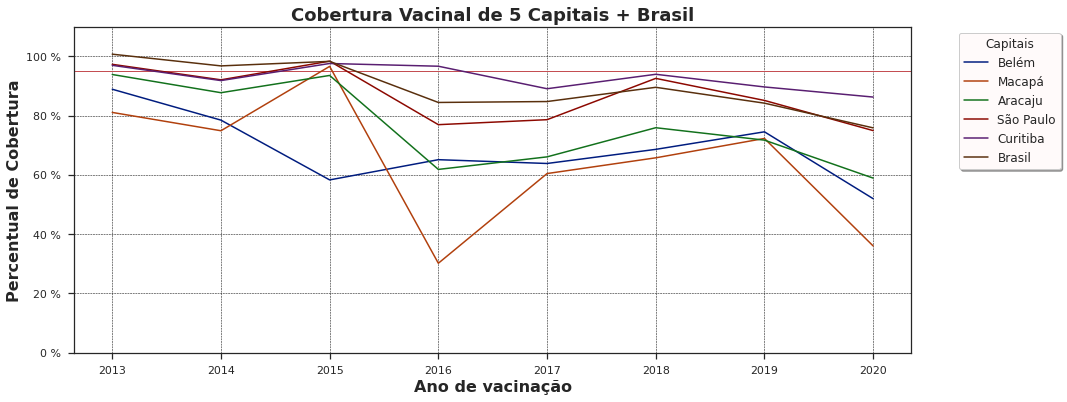

In [16]:
#Mudando o estilo de fundo
sns.set_style("ticks")

plt.figure(figsize=(15,6))
capitais = ["Curitiba", "Macapá", "Belém", "São Paulo", "Aracaju", "Brasil"]
ax = sns.lineplot(data=dv_capitais_polio_aberto.query("capital in @capitais"), 
                  x="ano", 
                  y="percentual", 
                  hue="capital",
                  palette="dark")

ax.set_title("Cobertura Vacinal de 5 Capitais + Brasil", fontsize=18, weight='black', loc='center')
ax.set_xlabel('Ano de vacinação', fontsize=16, weight='black')
ax.set_ylabel('Percentual de Cobertura', fontsize=16, weight='black')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f} %"))  
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=0, offset=1))
# plt.xticks(rotation=30)
plt.ylim(0,110)
plt.axhspan(94.9, 95.01, color='r') 
plt.legend(bbox_to_anchor=(1.05,1), title=('Capitais'), fontsize='large', frameon=True, facecolor='Snow', shadow=True)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

Podemos constatar que **Macapá** já estava abaixo da meta (linha vermelha) em 2013 e 2014. Em 2015 realizou campanhas de vacinação conseguindo atingir a meta, mas em 2016 acompanhou a grande queda da cobertura geral nacional, inclusive na cobertura contra a Poliomielite.

Outras capitais preocupantes são **Belém** e **Aracaju** que não atingem a meta desde 2013.

## Cobertura Vacinal contra Poliomielite nos Municípios Brasileiros

Analisaremos os dados de 2016 da cobertura vacinal dos diversos Municípios Brasileiro, identificaremos os 10 piores e como foi a evolução do percentual até 2020, e identificaremos os 10 piores em 2020.

**Dados obtidos em 10/06/2021**.

Filtros utilizados:
*   **Linha**: Municípios
*   **Coluna**: Ano
*   **Conteúdo**: Coberturas Vacinais
*   **Período**: 2001 até 2020
*   **Imuno**: Poliomielite
*   **Arquivo**: https://raw.githubusercontent.com/hc0rd31r0/Bootcamp-DataScience-projeto-modulo2/main/dados/cobertura_municipio_ano_polio-cpnibr16233753314.csv

---

In [17]:
url_github = 'https://github.com/hc0rd31r0/Bootcamp-DataScience-projeto-modulo2/blob/main/dados/cobertura_municipio_ano_polio-cpnibr16233753314.csv?raw=true'
dv_municipios_ano_polio_raw = pd.read_csv(url_github, engine='python', encoding="ISO-8859-1", sep=";", thousands=".", decimal=",")
dv_municipios_ano_polio = dv_municipios_ano_polio_raw.copy()
dv_municipios_ano_polio.columns = dv_municipios_ano_polio.columns.str.strip()

# Removo a coluna 'Total'
dv_municipios_ano_polio.drop("Total", axis=1, inplace=True)

# Ajusto a última linha 'Total' para a cobertura Brasil
dv_municipios_ano_polio.loc[dv_municipios_ano_polio.index.max(),"Município"] = "000000 Brasil"

# Continuando os ajustes
dv_municipios_ano_polio["municipio"] = dv_municipios_ano_polio["Município"].str[7:]

# removendo o caracter \ do nome do Município
dv_municipios_ano_polio["municipio"] = dv_municipios_ano_polio["municipio"].apply(lambda x : x.replace("\\", ""))
dv_municipios_ano_polio["municipio"] = dv_municipios_ano_polio["municipio"].apply(lambda x : x.strip())

dv_municipios_ano_polio = dv_municipios_ano_polio.set_index('municipio').drop('Município', axis=1)

In [18]:
dv_municipios_ano_polio.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
municipio,,,,,,,,,,,,,,,,,,,,
ALTA FLORESTA D'OESTE,105.36,106.99,94.95,75.87,95.48,107.98,145.74,102.71,108.48,101.54,105.66,97.43,101.51,99.74,101.05,101.76,105.87,111.35,152.82,94.92
ARIQUEMES,116.29,93.37,103.46,100.00,105.77,116.96,182.81,118.35,115.65,100.12,97.41,104.41,103.86,116.82,100.06,102.43,100.30,96.75,105.97,86.43
CABIXI,108.50,96.71,71.71,181.44,95.83,135.24,122.68,129.84,141.82,102.73,92.73,86.36,81.11,125.00,140.54,100.00,164.00,209.59,170.15,122.39
CACOAL,111.40,115.62,97.94,94.62,103.20,100.91,113.77,100.00,99.09,95.75,92.87,90.52,86.05,95.42,107.43,97.86,112.24,103.06,83.13,84.78
CEREJEIRAS,117.07,112.23,103.09,127.40,111.22,140.54,95.06,106.87,135.02,121.66,116.59,118.89,115.93,114.29,104.80,112.85,108.43,104.94,119.13,103.97


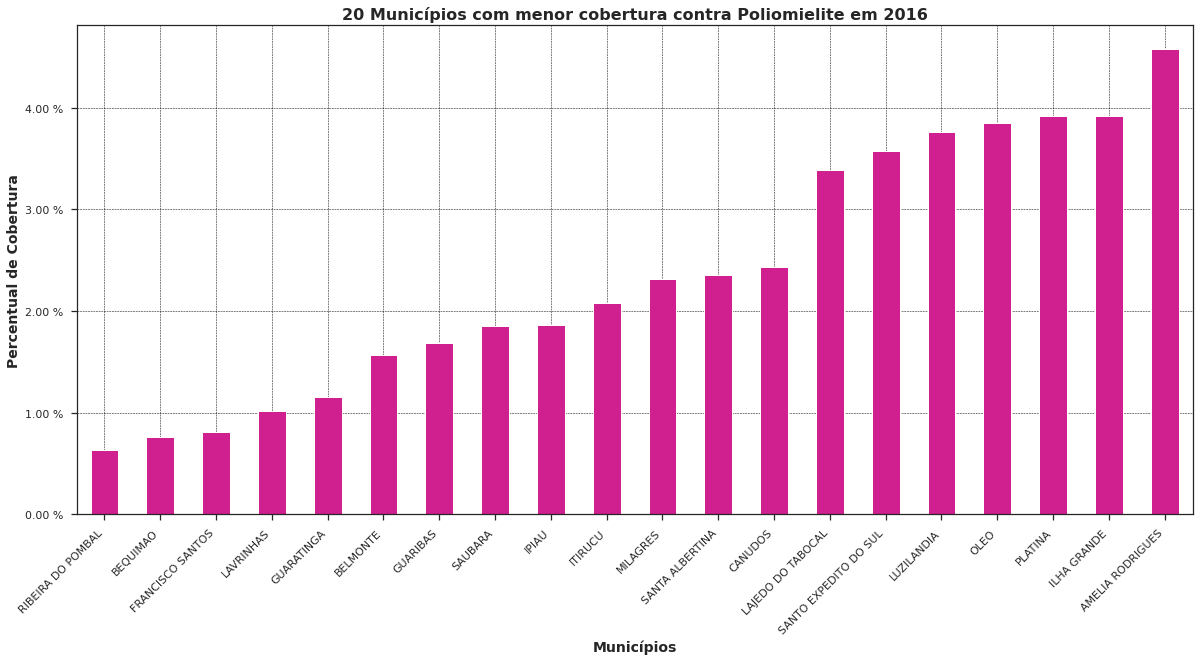

In [19]:
# Ordenado pelos valores de 2016
dv_municipios_ano_polio_2016 = dv_municipios_ano_polio.query("`2016` > 0").sort_values(by="2016")
ax = dv_municipios_ano_polio_2016.head(20).plot(y='2016', kind="bar", figsize=(20,9), grid=True, color="#D02090")
ax.set_title("20 Municípios com menor cobertura contra Poliomielite em 2016", fontsize=16, weight='black', loc='center')
ax.set_xlabel('Municípios', fontsize=14, weight='black')
ax.set_ylabel('Percentual de Cobertura', fontsize=14, weight='black')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} %"))
ax.legend('')
plt.xticks(rotation=45, ha="right")
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

Situação de extrema preocupação!!!!


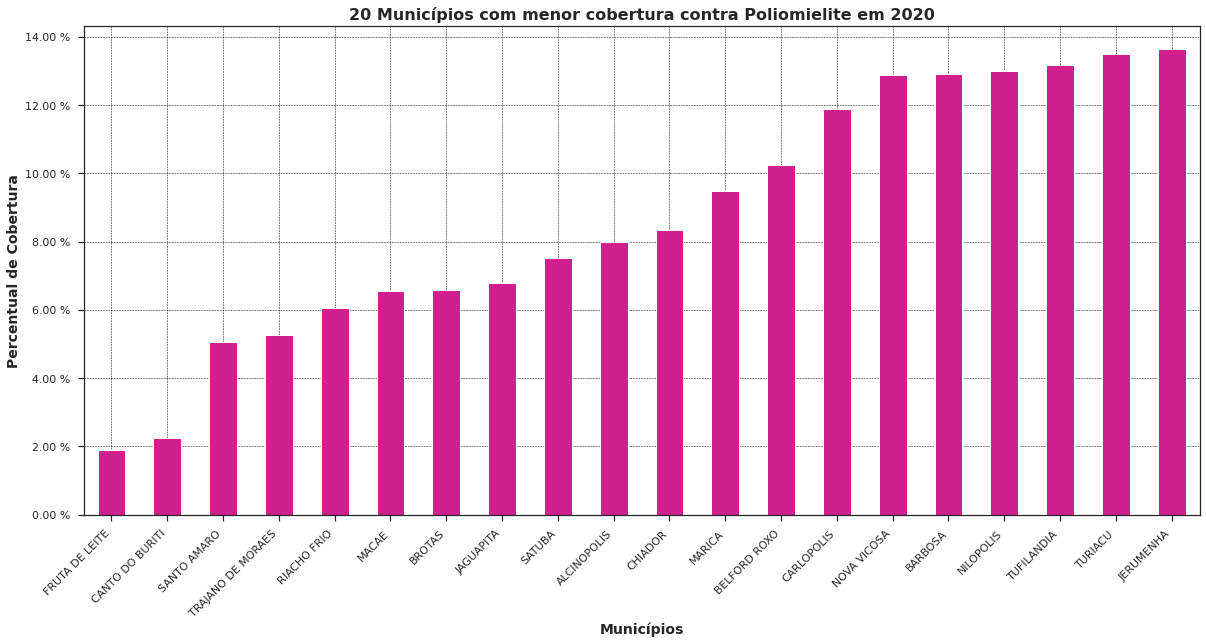

In [20]:
# Ordenado pelos valores de 2020
dv_municipios_ano_polio_2020 = dv_municipios_ano_polio.query("`2020` > 0").sort_values(by="2020")
ax = dv_municipios_ano_polio_2020.head(20).plot(y='2020', kind="bar", figsize=(20,9), grid=True, color="#D02090")
ax.set_title("20 Municípios com menor cobertura contra Poliomielite em 2020", fontsize=16, weight='black', loc='center')
ax.set_xlabel('Municípios', fontsize=14, weight='black')
ax.set_ylabel('Percentual de Cobertura', fontsize=14, weight='black')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} %"))
ax.legend('')
plt.xticks(rotation=45, ha="right")
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

Apesar de ainda estarem muito abaixo da meta de 95% de cobertura vacinal, na comparação com 2016 onde temos 19 (dezenove) municípios abaixo de 4%, em 2020 temos apenas 2 (dois), e o 5º pior começa com 6% de cobertura. Outra observação importante é os piores de 2016 não estão na lista dos piores de 2020.

Considero uma pequena melhora dos piores.


Os piores em 2016 não estão entre os piores de 2020.

#Conclusão

Nos últimos seis anos, a cobertura vacinal contra a poliomielite no Brasil sofreu uma queda muito acentuada, passando de patamares acima de 95% – o necessário para se obter imunidade coletiva –, para apenas 76%, como pode ser visto no gráfico *Brasil - % Cobertura Vacinal contra Poliomielite por Ano*.

Fazendo uma análise por município, os 20 piores são de extrema preocupação devido ao baixissimo percentual de cobertura vacinal apresentada.

A atual pandemia da COVID-19 mostrou a rapidez com que uma doença pode se disseminar e causar danos e mortes irreparáveis quando populações inteiras não possuem as defesas necessárias para combatê-la.

O Brasil possui capacidade, estrutura e experiência para vacinar toda a
população de uma forma rápida e eficiente, como já demonstrado no passado pelo PNI. Para que o país supere essa pandemia e não vivencie novos surtos de sarampo ou outras doenças anteriormente controladas, é importante reordenar ações e serviços para retomar as coberturas vacinais em tempo oportuno, garantir infraestrutura e logística para evitar o desabastecimento de doses,
uma intensa coordenação do Ministério da Saúde com os demais entes federativos e a comunicação com a população, de forma a conscientizá-la sobre a importância da vacinação e combater os movimentos anti-vacina.


#####**Referências**

* CDC(1999), ‘Ten great public health achievements – united states, 2001-2010’, *MMWRMorbidity and Mortality Weekly Report* 48(12), April 02–241; 243.

* Li, X., Mukandavire, C., Cucunubá, Z. M. et al. (2021), ‘Estimating the health impact of vaccination
against ten pathogens in 98 low-income and middle-income countries from 2000 to 2030: a modelling
study’, *The Lancet* 397(10272), 398–408.

* da Silva Junior, J. B. (2013), ‘40 anos do programa nacional de imunizações: uma conquista da
saúde pública brasileira’, *Epidemiologia e Serviços de Saúde* 22(1), 7–8.

* Homma, A., Martins, R. d. M., Leal, M. d. L. F., Freire, M. d. S. & Couto, A. R. (2011), ‘Atualização em vacinas, imunizações e inovação tecnológica’, *Ciencia e Saude Coletiva* 16(2), 445–458.

##### **Sites**
[Poliomielite: 312 cidades brasileiras não vacinaram mais da metade das crianças de até 1 ano (Jul/2018)](https://g1.globo.com/bemestar/noticia/poliomielite-312-cidades-brasileiras-nao-vacinaram-mais-da-metade-das-criancas-de-ate-1-ano.ghtml)

[FEMIPA - Sarampo, pólio, difteria… Por que doenças erradicadas estão voltando?](http://www.femipa.org.br/noticias/sarampo-polio-difteria-por-que-doencas-erradicadas-estao-voltando/)

[FIOCRUZ - Poliomielite: sintomas, transmissão e prevenção](https://www.bio.fiocruz.br/index.php/br/poliomielite-sintomas-transmissao-e-prevencao)

[Vacinação: 2016 teve a menor cobertura da última década](https://veja.abril.com.br/saude/vacinacao-2016-teve-a-menor-cobertura-da-ultima-decada/)


[SBMT - Perigo de reintrodução da poliomielite](https://www.sbmt.org.br/portal/perigo-de-reintroducao-da-poliomielite/)


[Unimed Fortaleza - Movimento antivacina: 4 doenças erradicadas que podem retornar ao Brasil](https://www.unimedfortaleza.com.br/blog/cuidar-de-voce/movimento-antivacina)